In [42]:
def show_corrcoef_heatmap(data):

  import seaborn as sns
  corr = data.corr()
  cmap = sns.diverging_palette(220, 10, as_cmap=True)


  import matplotlib.pyplot as plt

  sns.set(style="white")

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  ax = sns.heatmap(
    corr, 
    cmap=cmap,
    vmin=-1, vmax=1, center=0,
    annot=True,
    fmt=".2f",
    
    square=True
  )
  ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
  );

In [68]:
def MAPE(y_mesuree, y_modelisee):
  # Erreur moyenne relative des modèles (MAPE)
  import numpy as np
  diff = (y_modelisee - y_mesuree)/y_mesuree
  mape = np.abs(diff).sum()/len(diff)*100
  return np.round(mape,1)

In [1]:
import numpy as np

In [49]:
X = np.arange(0,100,1)
from random import uniform
import pandas as pd

A_reg = 0.7
B_reg = 150.0
Coef_error = 12.

A2_reg = 0.1
B_2reg = 50.0
Coef_error2 = 3

Error = Coef_error*np.random.randn(len(X))
Error2 = Coef_error2*np.random.randn(len(X))
Y = A_reg*X + B_reg + Error

X2 = A2_reg*X + B_2reg + Error2

X3 = np.random.randn(len(X))

data = pd.DataFrame({'X1':X,'X2':X2,'X3':X3,'Y':Y})

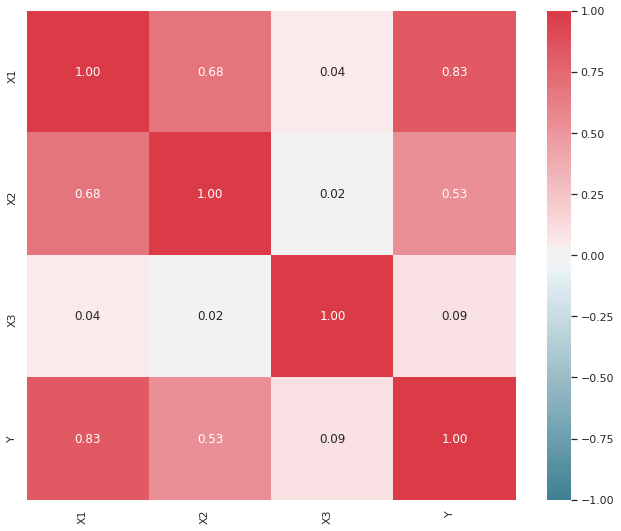

In [50]:
show_corrcoef_heatmap(data)

In [51]:
import plotly.express as px
fig = px.scatter_matrix(data)
fig.show()

In [52]:
dataset = data.values
	# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]


## regression lineaire simple

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)


linreg   = LinearRegression().fit(X_train, y_train)



print('Lin R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('Lin R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

y_predict_test  = linreg.predict(X_test)
y_predict_train = linreg.predict(X_train)

print('MAPE (test): {:.3f}\n'
     .format(MAPE(y_test,y_predict_test)))

print('MAPE (train): {:.3f}\n'
     .format(MAPE(y_train,y_predict_train)))



Lin R-squared score (training): 0.710
Lin R-squared score (test): 0.662

MAPE (test): 6.100

MAPE (train): 5.600



## Lasso

In [80]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
scaler = MinMaxScaler()




X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.01,0.05,0.1,0.2,0.5,0.7,0.9,1,5,10,20,30,50,80, 100,200,300,400,500,600,700,800]}
linlasso = Lasso()
model_lasso_vc = GridSearchCV(linlasso, parameters)
model_lasso_vc.fit(X_test, y_test)

score_train = []
score_test  = []
mape_test   = []
mape_train  = []


for a in parameters['alpha']:
  linlasso = Lasso(alpha=a)
  linlasso.fit(X_test, y_test)
  y_predict_test = linlasso.predict(X_test_scaled)
  y_predict_train = linlasso.predict(X_train_scaled)
  score_train.append(linlasso.score(X_train_scaled, y_train))
  score_test.append(linlasso.score(X_test_scaled, y_test))
  mape_test.append(MAPE(y_test,y_predict_test))
  mape_train.append(MAPE(y_train,y_predict_train))

df_result = pd.DataFrame(index =parameters['alpha'],data= {'Score_train':score_train,'Score_test':score_test,'MAPE_train':mape_train,'MAPE_test':mape_test})


In [81]:
import plotly.graph_objects as go

fig = go.Figure()

for v in df_result.columns:
  fig.add_trace(go.Scatter(x=df_result.index, y=df_result[v].values, name=v, mode='markers'))
fig.show()

## Ridge

In [82]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
scaler = MinMaxScaler()




X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.01,0.05,0.1,0.2,0.5,0.7,0.9,1,5,10,20,30,50,80, 100,200,300,400,500,600,700,800]}


score_train = []
score_test  = []
mape_test   = []
mape_train  = []


for a in parameters['alpha']:
  linridge = Ridge(alpha=a)
  linridge.fit(X_test, y_test)
  y_predict_test = linridge.predict(X_test_scaled)
  y_predict_train = linridge.predict(X_train_scaled)
  score_train.append(linridge.score(X_train_scaled, y_train))
  score_test.append(linridge.score(X_test_scaled, y_test))
  mape_test.append(MAPE(y_test,y_predict_test))
  mape_train.append(MAPE(y_train,y_predict_train))

df_result = pd.DataFrame(index =parameters['alpha'],data= {'Score_train':score_train,'Score_test':score_test,'MAPE_train':mape_train,'MAPE_test':mape_test})


In [83]:
import plotly.graph_objects as go

fig = go.Figure()

for v in df_result.columns:
  fig.add_trace(go.Scatter(x=df_result.index, y=df_result[v].values, name=v, mode='markers'))
fig.show()